In [66]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from datetime import datetime
from ggplot import *
from peakdetect import peakdetect

In [67]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)

In [68]:
#set inline plotting
%matplotlib inline

## Load Data

In [69]:
with open('immig/data/subtopic_percentage.json') as data_file:    
    data = json.load(data_file)

In [70]:
df = json_normalize(data)

In [71]:
df.head(10)

,share,time,topic
0,0.000127,2015-11-19,DAPA/DACA
1,0.069948,2015-11-19,Wall
2,0.016393,2015-11-19,Undocumented/Illegal Immigration
3,0.018305,2015-11-19,Mass Deportation
4,0.000085,2015-11-19,Sanctuary Cities
5,0.037076,2015-11-19,About Immigrants
6,0.044594,2015-11-19,Visa
7,0.010150,2015-11-19,Pathway to Citizenship
8,0.011594,2015-11-19,Amnesty
9,0.658074,2015-11-19,Syrian Refugee crisis


In [72]:
len(df)

5119

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5119 entries, 0 to 5118
Data columns (total 3 columns):
share    5119 non-null float64
time     5119 non-null object
topic    5119 non-null object
dtypes: float64(1), object(2)
memory usage: 160.0+ KB


## Process Data

In [74]:
#convert dates to datetime type
df['time'] = pd.to_datetime(df['time'])

In [75]:
#add column for percent
df['percent'] = df['share'].astype(float).map('{:,.2%}'.format)

In [76]:
topics = df 
#ts = df.set_index(['time'])

## Plot Data 

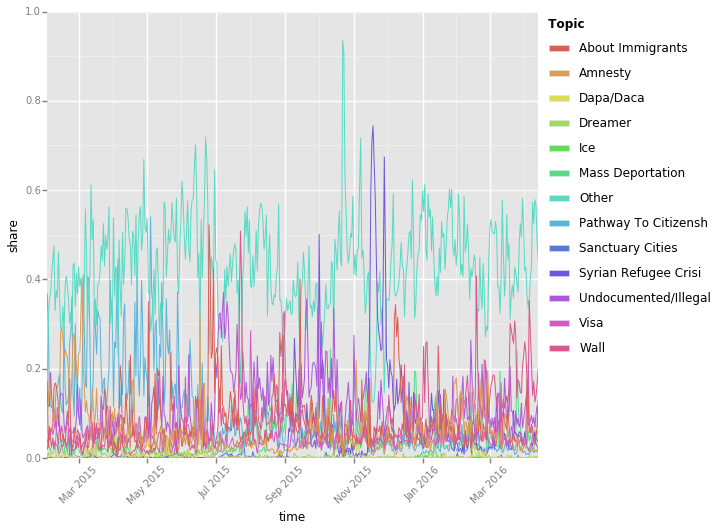

<ggplot: (276448441)>

In [89]:
data = topics
x='time'
y ='share'
colour = 'topic'
p = ggplot(aes(x=x, y=y, colour = colour), data=data) 
p + geom_line() + theme(axis_text_x=element_text(angle=45)) 

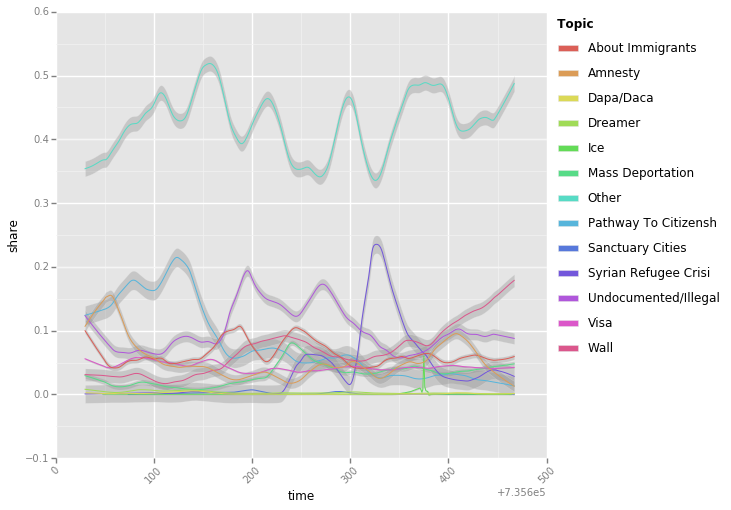

<ggplot: (283902933)>

In [90]:
#smoothed
data = topics
x='time'
y ='share'
colour = 'topic'
p = ggplot(aes(x=x, y=y, colour = colour), data=data) + stat_smooth(span=0.10)
p + theme(axis_text_x=element_text(angle=45))

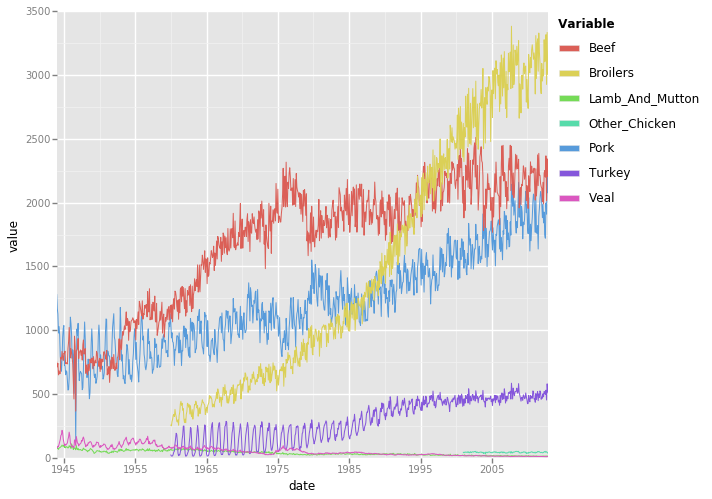

<ggplot: (284514625)>

In [20]:
#from ggplot import meat
#meat_lng = pd.melt(meat, id_vars=['date'])
#ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + geom_line()

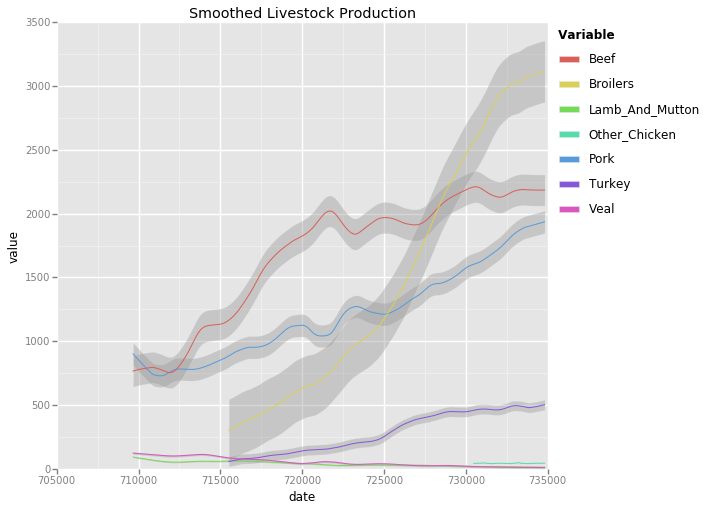

<ggplot: (285997273)>

In [79]:
#ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + \
#    stat_smooth(span=0.10) + \
#    ggtitle("Smoothed Livestock Production")